-------
PREMISE
-------
As larger change in price provides greater potential profits for trades in Forex, we want to find the largest candles (candle size represents price fluctations within a given time window (in this case, 15 minutes).


-------------------------------------------------------
PLOT 1: Price Ranges (with Standard Deviation and Mean)
-------------------------------------------------------


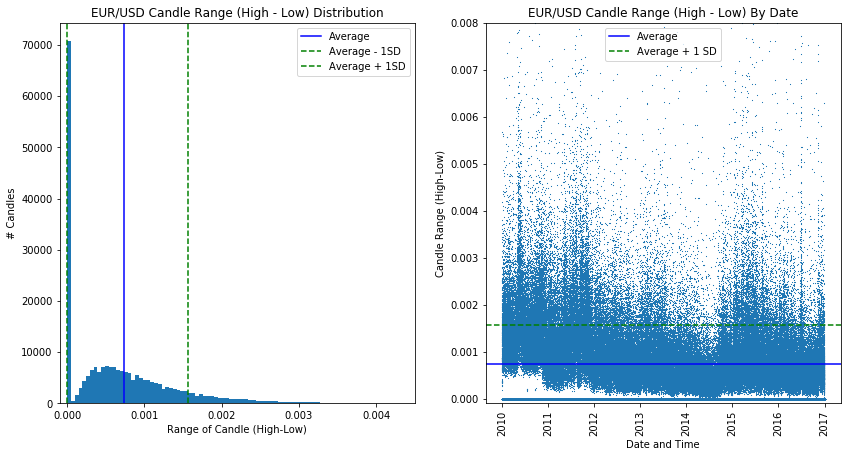

...so
Let's get an overview of candle sizes.

Plotting the candle size distribution, we can see that many candles are very small, so we want to filter out those candles (specifically if they have no price change, likely denoting the market is closed), and recalculate the mean and standard deviation to avoid noise.

Plotting (above average) candles by time, shows peaks in concentrated clusters, suggesting candles with higher range occur in groups by time, but not obviously predictably, as they are irregularly distributed.


-------------------------------
PLOT 2: Volume vs. Candle Range
-------------------------------


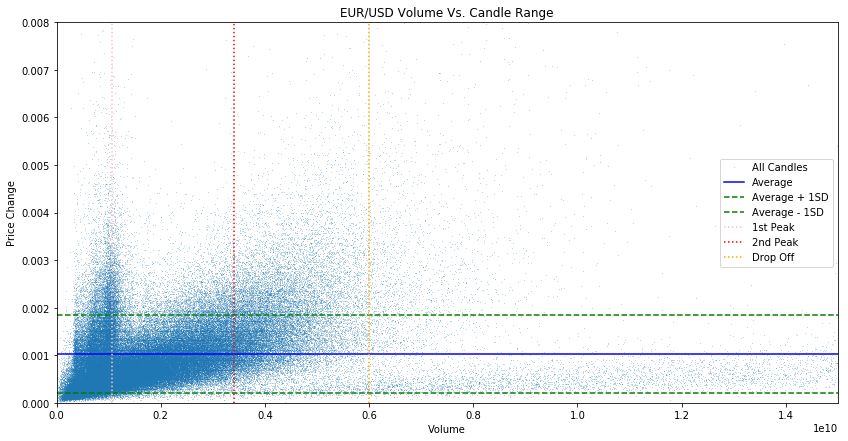

...so
Perhaps certain volumes will have larger candles?

It seems that there are two approximate peaks with a high concentration of large candles located at certain volumes. Perhaps more interestingly, the bottom of the distribution has a general upward slope.

Let's consider candles about midway through this concentrated body's upward slope, which we can arbitrarily pick as the second peak. It seems that there are less large candles after volume 6000000000.0, and only a sparse distribution of candles under the average, so let's add an additional constraint to consider candles below this volume.


---------------------------------------------------------
PLOT 3: Candle Range Distribution (All vs. Larger Volume)
---------------------------------------------------------


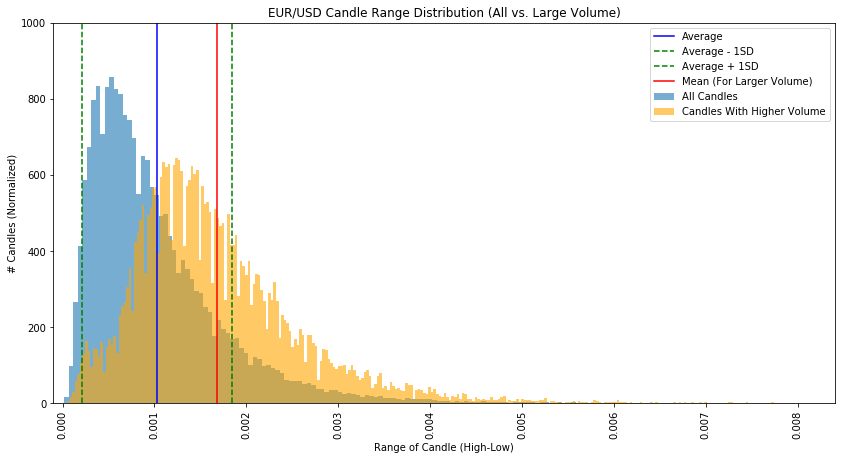

...so
Looking at candles with volumes past our second peak in candle size:
We see that 77% of candles are larger than the average, as opposed to ~50% unfiltered. The trade off is that there are less total candles (10.0% in this set) and inherently less total candles above average size in this set.


------------------------------------------------------
PLOT 4: Price Fluctuation by Day of Week
------------------------------------------------------



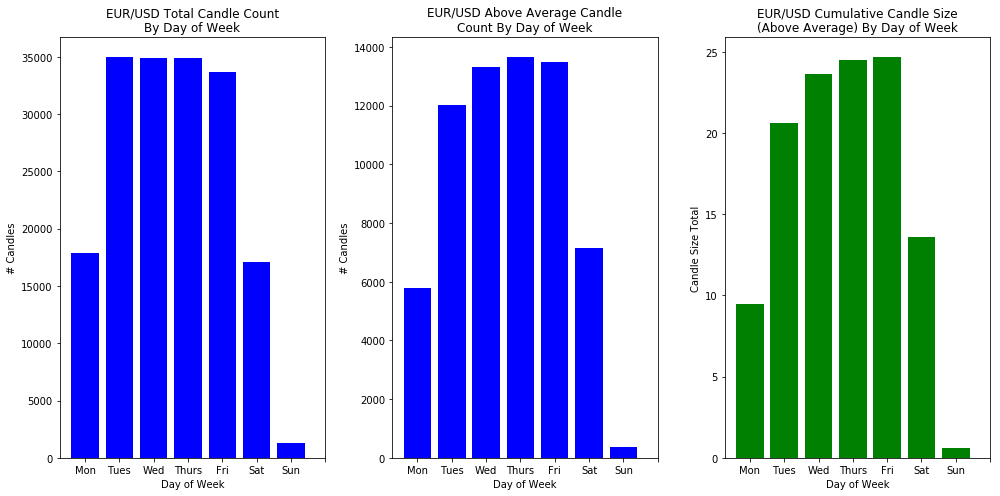

...so
Let's see if any days are especially better for finding large candles.
We can see that Tuesday through Friday are the best days to find above average candles, as these days have the most total candles, most candles above average size, and the largest cumulative candle range. Of these four days, none is especially outstanding.


-----------------------------------
PLOT 5: Price Level vs. Price Range
-----------------------------------


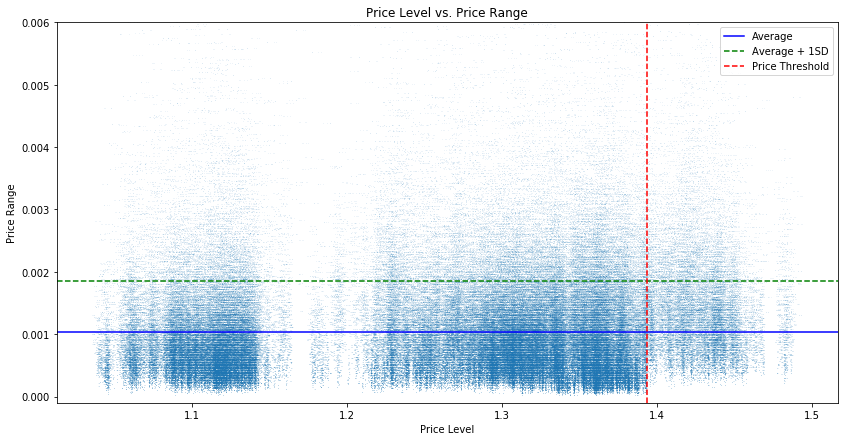

...so
Let's see if any price levels are especially better for finding large candles.
With darker columns and sparse gaps, it seems that candles, in general, occur more frequently at certain price levels, but large candles do not relatively become more common than smaller candles at any particular price level, except for perhaps slightly past price of 1.394. The trade off is that candles occur much less frequently past this price level.


---------------------------------------------------------------
PLOT 6: Candle Range Distribution (All vs. Higher Price Levels)
---------------------------------------------------------------


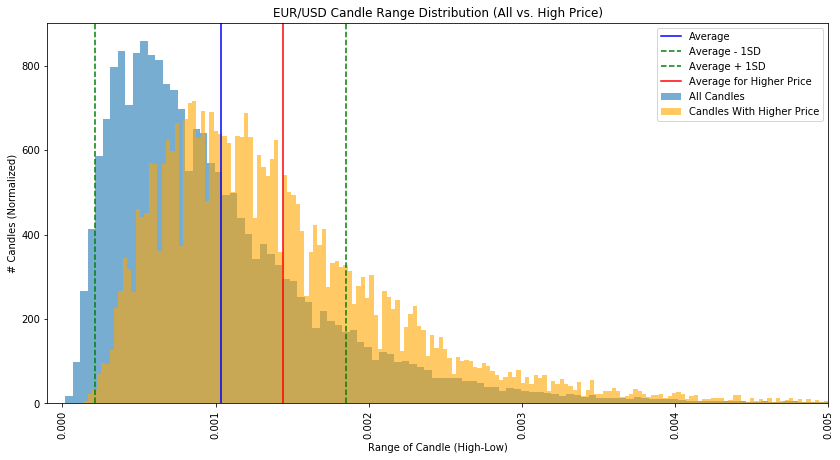

...so
Looking at candles with prices past our price threshold, 1.394:
63% (as opposed to 50% without filtering) of candles are above the average range, so there is a slight increase in average candle size when considering this subset. The trade off, is that we only have 7.0% of all candles, and so we inherently have less large candles.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

def main():
    csv_eur_usd = pd.read_csv('EURUSD_15m_BID_01.01.2010-31.12.2016.csv')
    eur_usd = pd.DataFrame(csv_eur_usd)
    """
    Data looks like:
                  Time     Open     High      Low    Close       Volume
    0  2010-01-01 00:00  1.43283  1.43293  1.43224  1.43293  608600007.1
    """
    
    # CALCULATE relevant metrics and columns to be used later
    eur_usd['range'] = eur_usd['High'] - eur_usd['Low']
    eur_usd['Time'] = pd.to_datetime(eur_usd['Time'])
    eur_usd['Day'] = eur_usd['Time'].dt.weekday_name
    average = eur_usd['range'].mean()
    standard_deviation = eur_usd['range'].std()
    average_volume = eur_usd['Volume'].mean()
    standard_deviation_volume = eur_usd['Volume'].std()
    detailed_output = False
    
    print(
        "-------\n"
        "PREMISE\n"
        "-------\n"
        "As larger change in price provides greater potential profits for "
        "trades in Forex, we want to find the largest candles (candle size "
        "represents price fluctations within a given time window (in this "
        "case, 15 minutes).")
    
    print(
        "\n"
        "\n"
        "-------------------------------------------------------\n"
        "PLOT 1: Price Ranges (with Standard Deviation and Mean)\n"
        "-------------------------------------------------------")
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.axvline(x=average, color='blue', label='Average')
    plt.axvline(
        x=0 if (average-standard_deviation) < 0
        else (average-standard_deviation),
        linestyle='dashed', color='green', label='Average - 1SD')
    plt.axvline(
        x=average+standard_deviation, linestyle='dashed',
        color='green', label='Average + 1SD')
    count_above_SD = len(
        eur_usd[eur_usd['range']>(average+standard_deviation)])
    total_count = eur_usd['range'].count()
    if detailed_output:
        print(
            "Of all candles:\n"
            "    {} of {} of all candles are greater than "
            "1 SD above average (~{}%)".format(
            count_above_SD, total_count,
            round((100.0*count_above_SD)/total_count)))
    plt.hist(eur_usd['range'], bins=500)
    plt.xlim([-.0001, .0045])
    plt.title('EUR/USD Candle Range (High - Low) Distribution')
    plt.ylabel('# Candles')
    plt.xlabel('Range of Candle (High-Low)')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(eur_usd['Time'], eur_usd['range'], '*', markersize=0.5, label='')
    plt.axhline(y=average, color='blue', label='Average')
    plt.axhline(
        y=average+standard_deviation, linestyle='dashed', color='green',
        label='Average + 1 SD')
    plt.ylim([-0.0001, 0.008])    
    plt.title('EUR/USD Candle Range (High - Low) By Date')
    plt.ylabel('Candle Range (High-Low)')
    plt.xlabel('Date and Time')
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show()
    print(
        "...so\n"
        "Let's get an overview of candle sizes.\n"
        "\n"
        "Plotting the candle size distribution, we can see that many candles "
        "are very small, so we want to filter out those candles (specifically "
        "if they have no price change, likely denoting the market is closed), "
        "and recalculate the mean and standard deviation to avoid noise.\n"
        "\n"
        "Plotting (above average) candles by time, shows peaks in "
        "concentrated clusters, suggesting candles with higher range occur in "
        "groups by time, but not obviously predictably, as they are "
        "irregularly distributed.")
    
    # Recalculate after filter out candles with no price change
    eur_usd = eur_usd[eur_usd['range'] > 0]
    average = eur_usd['range'].mean()
    standard_deviation = eur_usd['range'].std()
    average_volume = eur_usd['Volume'].mean()
    standard_deviation_volume = eur_usd['Volume'].std()
    
    print(
        "\n"
        "\n"
        "-------------------------------\n"
        "PLOT 2: Volume vs. Candle Range\n"
        "-------------------------------")
    plt.figure(figsize=(14, 7))
    plt.plot(
        eur_usd['Volume'], eur_usd['range'], '*', markersize=0.2, alpha=0.4,
        color='C0', label='All Candles')
    plt.axhline(y=average, color='blue', label='Average')
    plt.axhline(
        y=average+standard_deviation, linestyle='dashed', color='green',
        label='Average + 1SD')
    plt.axhline(
        y=average-standard_deviation, linestyle='dashed', color='green',
        label='Average - 1SD')
    first_peak = 1.06 * (10 ** 9)
    plt.axvline(
        x=first_peak, color='pink', linestyle='dotted', linewidth = 1.5,
        label='1st Peak')
    second_peak = 3.4 * (10 ** 9)
    plt.axvline(
        x=second_peak, color='red', linestyle='dotted', linewidth = 1.5,
        label='2nd Peak')
    volume_drop_off = 6.0 * (10 ** 9)
    plt.axvline(
        x=volume_drop_off, color='orange', linestyle='dotted', linewidth = 1.5,
        label='Drop Off')
    plt.ylim([0, .008])
    plt.xlim([0, 1.5*(10**10)])
    plt.title('EUR/USD Volume Vs. Candle Range')
    plt.ylabel('Price Change')
    plt.xlabel('Volume')
    plt.legend()
    plt.show()
    print(
        "...so\n"
        "Perhaps certain volumes will have larger candles?\n"
        "\n"
        "It seems that there are two approximate peaks with a high "
        "concentration of large candles located at certain volumes. Perhaps "
        "more interestingly, the bottom of the distribution has a general "
        "upward slope.\n"
        "\n"
        "Let's consider candles about midway through this concentrated body's "
        "upward slope, which we can arbitrarily pick as the second peak. It "
        "seems that there are less large candles after volume {}, and only a "
        "sparse distribution of candles under the average, so let's add an "
        "additional constraint to consider candles below this volume.".format(
            volume_drop_off))
    
    print(
        "\n"
        "\n"
        "---------------------------------------------------------\n"
        "PLOT 3: Candle Range Distribution (All vs. Larger Volume)\n"
        "---------------------------------------------------------")
    plt.figure(figsize=(14, 7))
    plt.axvline(x=average, color='blue', label='Average')
    plt.axvline(x=0 if (average-standard_deviation) < 0
        else (average-standard_deviation),
        linestyle='dashed', color='green', label='Average - 1SD')
    plt.axvline(x=average+standard_deviation, linestyle='dashed',
        color='green', label='Average + 1SD')
    plt.hist(
        eur_usd['range'], bins=500, color='C0', normed=True, alpha=0.6,
        label='All Candles')
    with_large_volume = eur_usd[eur_usd['Volume']>second_peak]
    with_large_volume = with_large_volume[with_large_volume['Volume']<volume_drop_off]
    plt.hist(
        with_large_volume['range'], bins=500, color='orange', normed=True,
        alpha=0.6, label='Candles With Higher Volume')
    plt.axvline(x=with_large_volume['range'].mean(), color='red',
        label='Mean (For Larger Volume)')
    large_volume_count = len(with_large_volume)
    percent_with_volume = round((100.0*large_volume_count)/total_count)
    if detailed_output:
        print(
            "For candles with volume greater than {}:\n"
            "    {} of all {} candles are in this set. (~{}%)".
            format(second_peak, large_volume_count, total_count,
            percent_with_volume))
    percent_greater_than_average = round(
        (100.0*len(with_large_volume[with_large_volume['range']>average]))
        /large_volume_count)
    percent_greater_than_standard_deviation = round(
        (100.0*len(with_large_volume[with_large_volume['range']
        >(average+standard_deviation)]))/large_volume_count)
    if detailed_output:
        print(
            "    {}% of set is larger than original average\n"
            "    {}% of set is larger than orignal average + 1 SD"
            .format(percent_greater_than_average,
            percent_greater_than_standard_deviation))
    plt.xlim([-.0001, .0084])
    plt.ylim([0, 1000])
    plt.title("EUR/USD Candle Range Distribution (All vs. Large Volume)")
    plt.ylabel('# Candles (Normalized)')
    plt.xlabel('Range of Candle (High-Low)')
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show()
    """
    For candles with volume greater than 3400000000.0:
        32530 of all 245444 candles are in this set. (~13.0%)
        68% of set is larger than original average
        32% of set is larger than orignal average + 1 SD
    """
    print(
        "...so\n"
        "Looking at candles with volumes past our second peak in candle size:"
        "\n"
        "We see that {}% of candles are larger than the average, as opposed "
        "to ~50% unfiltered. The trade off is that there are less total "
        "candles ({}% in this set) and inherently less total candles above "
        "average size in this set.".format(
            percent_greater_than_average, percent_with_volume))
    
    print(
        "\n"
        "\n"
        "------------------------------------------------------\n"
        "PLOT 4: Price Fluctuation by Day of Week\n"
        "------------------------------------------------------\n")
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 3, 1)
    day_conversion = {
        'Monday':0,
        'Tuesday':1,
        'Wednesday': 2,
        'Thursday': 3,
        'Friday': 4,
        'Saturday': 5,
        'Sunday': 6
        }
    total_count_day = pd.DataFrame(eur_usd.groupby('Day').count()['range'])
    for index in total_count_day.index:
        total_count_day.loc[index, 'Day_Number'] = day_conversion[index] 
    plt.bar(
        total_count_day['Day_Number'], total_count_day['range'], color='blue')
    plt.xticks(range(8), ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'))
    plt.title("EUR/USD Total Candle Count\nBy Day of Week")
    plt.ylabel('# Candles')
    plt.xlabel('Day of Week')
    
    plt.subplot(1, 3, 2)
    count_day = eur_usd[eur_usd['range'] > average]
    count_day = pd.DataFrame(count_day.groupby('Day').count()['range'])
    for index in count_day.index:
        count_day.loc[index, 'Day_Number'] = day_conversion[index]
    plt.bar(count_day['Day_Number'], count_day['range'], color='blue')
    plt.xticks(range(8), ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'))
    plt.title("EUR/USD Above Average Candle\nCount By Day of Week")
    plt.ylabel('# Candles')
    plt.xlabel('Day of Week')
    
    plt.subplot(1, 3, 3)
    sum_day = eur_usd[eur_usd['range'] > average]
    sum_day = pd.DataFrame(sum_day.groupby('Day').sum()['range'])
    for index in sum_day.index:
        sum_day.loc[index, 'Day_Number'] = day_conversion[index]
    plt.bar(sum_day['Day_Number'], sum_day['range'], color='green')
    plt.xticks(range(8), ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'))
    plt.title("EUR/USD Cumulative Candle Size\n(Above Average) By Day of Week")
    plt.ylabel('Candle Size Total')
    plt.xlabel('Day of Week')
    plt.tight_layout()
    plt.show()
    print(
        "...so\n"
        "Let's see if any days are especially better for finding large "
        "candles.\n"
        "We can see that Tuesday through Friday are the best days to find "
        "above average candles, as these days have the most total candles, "
        "most candles above average size, and the largest cumulative candle "
        "range. Of these four days, none is especially outstanding.")
    
    print(
        "\n"
        "\n"
        "-----------------------------------\n"
        "PLOT 5: Price Level vs. Price Range\n"
        "-----------------------------------")
    plt.figure(figsize=(14, 7))
    plt.plot(
        eur_usd['Open'], eur_usd['range'], '*', color='C0', markersize=0.2,
        alpha=.1, label='')
    plt.plot(
        eur_usd['High'], eur_usd['range'], '*', color='C0', markersize=0.2,
        alpha=.1, label='')
    plt.plot(
        eur_usd['Low'], eur_usd['range'], '*', color='C0', markersize=0.2,
        alpha=.1, label='')
    plt.plot(
        eur_usd['Close'], eur_usd['range'], '*', color='C0', markersize=0.2,
        alpha=.1, label='')
    plt.axhline(y=average, color='blue', label='Average')
    plt.axhline(
        y=average+standard_deviation, linestyle='dashed', color='green',
        label='Average + 1SD')
    price_threshold = 1.394
    plt.axvline(
        x=price_threshold, linestyle='dashed', color='red',
        label='Price Threshold')
    plt.ylim(-0.0001, .006)
    plt.title("Price Level vs. Price Range")
    plt.xlabel("Price Level")
    plt.ylabel("Price Range")
    plt.legend()
    plt.show()
    print(
        "...so\n"
        "Let's see if any price levels are especially better for finding "
        "large candles.\n"
        "With darker columns and sparse gaps, it seems that candles, in "
        "general, occur more frequently at certain price levels, but large "
        "candles do not relatively become more common than smaller candles "
        "at any particular price level, except for perhaps slightly past "
        "price of {}. The trade off is that candles occur much less "
        "frequently past this price level.".format(price_threshold))
    
    print(
        "\n"
        "\n"
        "---------------------------------------------------------------\n"
        "PLOT 6: Candle Range Distribution (All vs. Higher Price Levels)\n"
        "---------------------------------------------------------------")
    plt.figure(figsize=(14, 7))
    plt.axvline(x=average, color='blue', label='Average')
    plt.axvline(
        x=0 if (average-standard_deviation) < 0
            else (average-standard_deviation),
        linestyle='dashed', color='green', label='Average - 1SD')
    plt.axvline(
        x=average+standard_deviation, linestyle='dashed', color='green',
        label='Average + 1SD')
    plt.hist(
        eur_usd['range'], bins=500, color='C0', normed=True, alpha=0.6,
        label='All Candles')
    
    with_high_price = eur_usd[eur_usd['High']>price_threshold]
    plt.hist(
        with_high_price['range'], bins=500, color='orange', normed=True,
        alpha=0.6, label='Candles With Higher Price')
    plt.axvline(x=with_high_price['range'].mean(), color='red',
        label='Average for Higher Price')
    high_price_count = len(with_high_price)
    percent_with_price = round((100.0*high_price_count)/total_count)
    if detailed_output:
        print(
            "For candles with price high greater than price {}:\n"
            "    {} of all {} candles are in this set. (~{}%)".
            format(
                price_threshold, high_price_count, total_count,
                percent_with_price))
    percent_greater_than_average = round(
        (100.0*len(with_high_price[with_high_price['range']>average]))
        /high_price_count)
    percent_greater_than_standard_deviation = round(
        (100.0*len(with_high_price[with_high_price['range']
        >(average+standard_deviation)]))/high_price_count)
    if detailed_output:
        print(
            "    {}% of set is larger than original average\n"
            "    {}% of set is larger than orignal average + 1 SD"
            .format(percent_greater_than_average,
            percent_greater_than_standard_deviation))
    plt.xlim([-.0001, .005])
    plt.title("EUR/USD Candle Range Distribution (All vs. High Price)")
    plt.ylabel('# Candles (Normalized)')
    plt.xlabel('Range of Candle (High-Low)')
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show()
    """
    For candles with price high greater than price 1.394:
        16133 of all 245444 candles are in this set. (~7.0%)
        63% of set is larger than original average
        24% of set is larger than orignal average + 1 SD
    """
    print(
        "...so\n"
        "Looking at candles with prices past our price threshold, {}:\n"
        "{}% (as opposed to 50% without filtering) of candles are above the "
        "average range, so there is a slight increase in average candle size "
        "when considering this subset. The trade off, is that we only have "
        "{}% of all candles, and so we inherently have less large candles."
        .format(
            price_threshold, percent_greater_than_average, percent_with_price))
    
if __name__ == '__main__':
    main()